## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('UFO_data.csv', delimiter=';')

C:\Users\jesse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,23,26,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ufo = df.iloc[:, :36]

In [4]:
ufo1=ufo[['apparentTemperature','cloudCover','dewPoint','humidity','pressure','temperature','visibility','windBearing','windSpeed']]

In [5]:
ufo2=ufo1.dropna()

In [6]:
ufo2

,apparentTemperature,cloudCover,dewPoint,humidity,pressure,temperature,visibility,windBearing,windSpeed
0,25.86,0.00,20.56,0.73,1009.05,25.86,16.09,154.0,4.89
1,26.12,0.00,21.72,0.77,1008.81,26.12,16.09,135.0,6.60
3,22.68,0.12,17.04,0.71,1020.64,22.68,16.09,136.0,2.75
4,25.74,0.63,21.47,0.77,1015.33,25.74,16.09,80.0,3.60
7,12.22,0.30,7.29,0.72,1011.79,12.22,16.09,329.0,5.71
...,...,...,...,...,...,...,...,...,...
65530,21.49,0.88,14.73,0.65,1013.53,21.49,16.09,138.0,3.10
65531,22.83,0.22,16.61,0.68,1016.90,22.83,16.09,201.0,1.69
65532,33.59,0.11,25.33,0.84,1013.85,28.31,16.05,202.0,1.72
65533,22.61,0.01,10.55,0.46,1006.77,22.61,16.09,226.0,2.11


In [7]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
ufo_weather_scaled = sc.fit_transform(ufo2)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(ufo_weather_scaled)

reduce_ufo = pca.transform(ufo_weather_scaled)



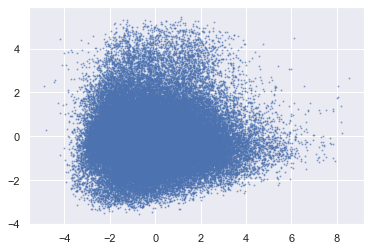

In [11]:
fig= plt.scatter(
        reduce_ufo[: , 0],
        reduce_ufo[: , 1],
        alpha = 0.5,
        s = 1)
plt.show()

In [12]:
pca.components_.shape

(2, 9)

In [16]:
pca_result = pca.components_.T

In [28]:
label = list(ufo2.columns)

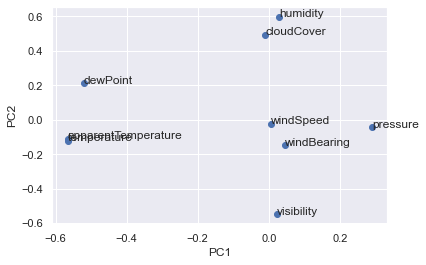

In [30]:
z = pca_result[: , 0]
y = pca_result[:, 1]
plt.scatter(
        pca_result[: , 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')

# for x,y in zip(pca_result[:,0], pca_result[:,1]):
#     label = label
#     plt.annotate(label, # this is the text
#                  (x,y), # this is the point to label
#                  textcoords='offset points', # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

for i, txt in enumerate(label):
    plt.annotate(txt, (z[i], y[i]))


plt.show()

In [37]:

pca = PCA()
pca.fit(ufo_weather_scaled)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(ufo_weather_scaled)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (62656, 9)


Text(0, 0.5, '% Cumulative explained variance')

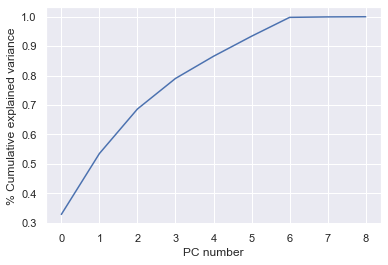

In [39]:
import numpy as np
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [43]:
# do this thing again, but basing n_components to 6 this time

pca_final = PCA(n_components=6)
pca_final.fit(ufo_weather_scaled)

# Transform the data to its low-dimensional representation
reduced_faces = pca_final.transform(ufo_weather_scaled)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (62656, 6)


In [44]:
pca_final_results = pca_final.components_.T

In [49]:
ufo_pca_result = pd.DataFrame(reduced_faces)

In [50]:
ufo_pca_result

,0,1,2,3,4,5
0,-2.423065,-0.425925,0.365233,0.448317,-0.896086,-0.641775
1,-2.519264,-0.278920,0.893235,0.923981,-1.494815,-0.576051
2,-1.444537,-0.328586,-1.059702,0.346492,-0.858910,-0.033811
3,-2.253347,0.754910,-0.191706,1.143663,-0.800639,-0.547604
4,-0.079945,-0.283747,1.797268,-0.667388,-1.066963,-0.396759
...,...,...,...,...,...,...
62651,-1.515633,0.647977,0.490250,0.810554,-0.073753,-0.527658
62652,-1.572252,-0.340764,-0.817298,-0.394395,-0.266114,-0.294986
62653,-2.981008,0.019056,-1.085266,-0.701767,-0.706769,-0.649716
62654,-1.652887,-1.426318,0.206920,-0.423681,0.898391,-0.523756
